# Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_excel('WinRateData.xlsx')

# Visualization

In [34]:
def visualise_quartile_values(column):
    sorted_df = df.sort_values(by=column).reset_index(drop=True)
    positions = [0, len(sorted_df) // 4, len(sorted_df) // 2, (3 * len(sorted_df)) // 4, len(sorted_df) - 1]
    points = [sorted_df.iloc[pos] for pos in positions]

    # Plotting
    plt.figure(figsize=(10, 6))
    # Plot histogram and label it
    n, bins, patches = plt.hist(df[column], bins=20, color='skyblue', alpha=0.7, edgecolor='black', density=True, label= column + 'Probability Density')

    # Initialize a list to keep track of labels for the legend
    l1 = column + " density"
    labels = [l1]

    # Add vertical lines for the specific probabilities
    colors = ['red', 'green', 'blue', 'orange', 'purple']  # Different color for each line
    for i, (point, color) in enumerate(zip(points, colors), start=1):
        label = f"{i}: ({point['Rank1']}, {point['Rank2']}, '{point['Color']}'): {point[column]:.2f}%"
        plt.axvline(x=point[column], color=color, linestyle='--', linewidth=4, label=label)
        plt.text(point[column],np.interp(point[column], bins[:-1], n), f"{i}", fontsize=15, fontstyle='italic')
        labels.append(label)

    # Create custom labels for the legend
    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, title="Key Probabilities")

    plt.xlabel(column + ' (%)')
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column +  's with Specific Probabilities Highlighted')
    plt.tight_layout()
    plt.show()


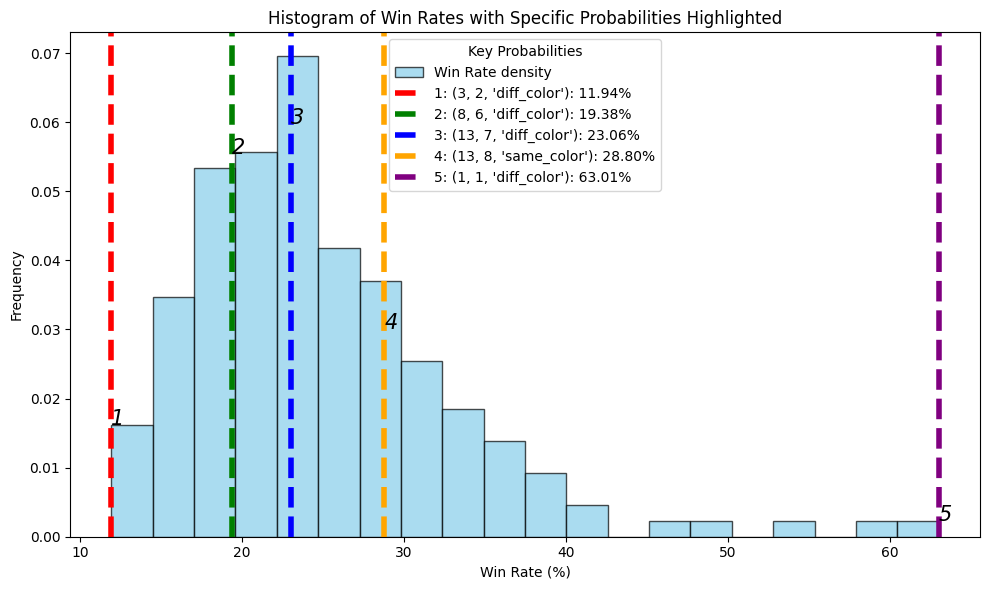

In [35]:
visualise_quartile_values('Win Rate')

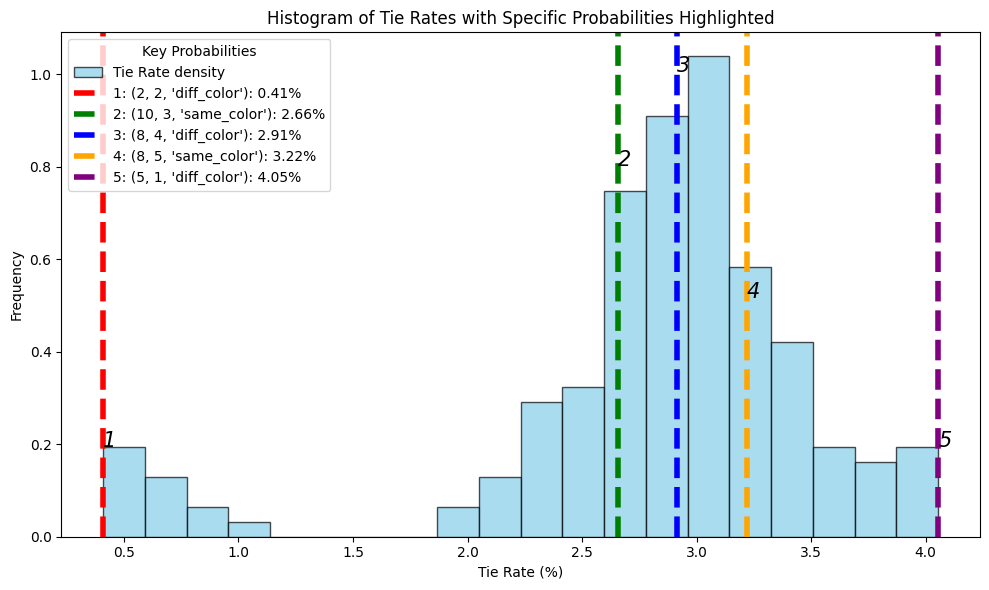

In [36]:
visualise_quartile_values('Tie Rate')